In [1]:
import pandas as pd
import numpy as np
import os

# Give the path of the test and train folder of UCI HAR Dataset
train_path = "C:/users/dinub/Downloads/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/train"
test_path = "C:/Users/dinub/Downloads/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/test"

# Dictionary of activities. Provided by the dataset.
ACTIVITIES = {1: 'WALKING' ,2: 'WALKING_UPSTAIRS' ,3: 'WALKING_DOWNSTAIRS' ,4: 'SITTING',
              5: 'STANDING' , 6: 'LAYING'   }


# Combining Traing Data

# Load all the accelerometer data
total_acc_x = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_x_train.txt"),sep = r'\s+' ,header=None)
total_acc_y = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_y_train.txt"),sep = r'\s+',header=None)
total_acc_z = pd.read_csv(os.path.join(train_path,"Inertial Signals","total_acc_z_train.txt"),sep = r'\s+',header=None)


# Read the subject IDs
subject_train = pd.read_csv(os.path.join(train_path,"subject_train.txt"),sep = r'\s+',header=None)
# print(subject_train)
# print(np.unique(subject_train))

# Read the labels
y = pd.read_csv(os.path.join(train_path,"y_train.txt"),sep = r'\s+',header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_train.values):

    sub_idxs = np.where( subject_train.iloc[:,0] == subject )[0]
    labels = y.loc[sub_idxs]

    # Toggle through all the labels.
    for label in np.unique(labels.values):

        # make the folder directory if it does not exist
        if not os.path.exists(os.path.join("Combined","Train",ACTIVITIES[label])):
            os.makedirs(os.path.join("Combined","Train",ACTIVITIES[label]))

        label_idxs = labels[labels.iloc[:,0] == label].index

        accx = []
        accy = []
        accz = []

        for idx in label_idxs:
            if accx is not None:
                accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                accz = np.hstack((accz,total_acc_z.loc[idx][64:]))

            else:
                accx = total_acc_x.loc[idx]
                accy = total_acc_y.loc[idx]
                accz = total_acc_z.loc[idx]

        # saving the data into csv file
        data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
        save_path = os.path.join("Combined","Train",ACTIVITIES[label],f"Subject_{subject}.csv")
        data.to_csv(save_path,index=False)

print("Done Combining the training data")

Done Combining the training data


In [2]:
# Combining Dataset 

total_acc_x = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_x_test.txt"),sep = r'\s+',header=None)
total_acc_y = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_y_test.txt"),sep = r'\s+',header=None)
total_acc_z = pd.read_csv(os.path.join(test_path,"Inertial Signals","total_acc_z_test.txt"),sep = r'\s+',header=None)

# Read the subject IDs
subject_test = pd.read_csv(os.path.join(test_path,"subject_test.txt"),sep = r'\s+',header=None)

# Read the labels
y = pd.read_csv(os.path.join(test_path,"y_test.txt"),sep = r'\s+',header=None)

# Toggle through all the subjects.
for subject in np.unique(subject_test.values):
    
        sub_idxs = np.where( subject_test.iloc[:,0] == subject )[0]
        labels = y.loc[sub_idxs]

        # Toggle through all the labels.
        for label in np.unique(labels.values):
    
            if not os.path.exists(os.path.join("Combined","Test",ACTIVITIES[label])):
                os.makedirs(os.path.join("Combined","Test",ACTIVITIES[label]))
    
            label_idxs = labels[labels.iloc[:,0] == label].index
    
            accx = []
            accy = []
            accz = []
            for idx in label_idxs:
                if accx is not None:
                    accx = np.hstack((accx,total_acc_x.loc[idx][64:]))
                    accy = np.hstack((accy,total_acc_y.loc[idx][64:]))
                    accz = np.hstack((accz,total_acc_z.loc[idx][64:]))
    
                else:
                    accx = total_acc_x.loc[idx]
                    accy = total_acc_y.loc[idx]
                    accz = total_acc_z.loc[idx]
    
            # saving the data into csv file
            data = pd.DataFrame({'accx':accx,'accy':accy,'accz':accz})
            save_path = os.path.join("Combined","Test",ACTIVITIES[label],f"Subject_{subject}.csv")
            data.to_csv(save_path,index=False)

print("Done Combining the testing data")

Done Combining the testing data


In [3]:

# Library imports
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os

# Constants
time = 10
offset = 100
folders = ["LAYING","SITTING","STANDING","WALKING","WALKING_DOWNSTAIRS","WALKING_UPSTAIRS"]
classes = {"WALKING":1,"WALKING_UPSTAIRS":2,"WALKING_DOWNSTAIRS":3,"SITTING":4,"STANDING":5,"LAYING":6}

combined_dir = os.path.join("Combined")

# Train Dataset
X_train=[]
y_train=[]
dataset_dir = os.path.join(combined_dir,"Train")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))

    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_train.append(df.values)
        y_train.append(classes[folder])

X_train = np.array(X_train)
y_train = np.array(y_train)


# Test Datasets

X_test=[]
y_test=[]
dataset_dir = os.path.join(combined_dir,"Test")

for folder in folders:
    files = os.listdir(os.path.join(dataset_dir,folder))
    for file in files:

        df = pd.read_csv(os.path.join(dataset_dir,folder,file),sep=",",header=0)
        df = df[offset:offset+time*50]
        X_test.append(df.values)
        y_test.append(classes[folder])

X_test = np.array(X_test)
y_test = np.array(y_test)

# Final Combined Dataset

# concatenate the training and testing data
X = np.concatenate((X_train,X_test))
y = np.concatenate((y_train,y_test))

# split the data into training,testing, and validation sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=4,stratify=y)
X_test,X_val,y_test,y_val = train_test_split(X_test,y_test,test_size=0.5,random_state=4,stratify=y_test)

print("Training data shape: ",X_train.shape)
print("Testing data shape: ",X_test.shape)
print("Validation data shape: ",X_val.shape)

Training data shape:  (108, 500, 3)
Testing data shape:  (36, 500, 3)
Validation data shape:  (36, 500, 3)


In [4]:
# print(X_train)
# print('--'*20)
# print(X_train.reshape(-1,3))

In [5]:
df = pd.DataFrame(np.concatenate((X_train.reshape((-1, 3)), np.repeat(y_train, 500).reshape(-1,1)), axis = 1), columns = ["Accx", "Accy", "Accz", "Label"])
test_df = pd.DataFrame(np.concatenate((X_test.reshape((-1, 3)), np.repeat(y_test, 500).reshape(-1,1)), axis = 1), columns = ["Accx", "Accy", "Accz", "Label"])

<div style="text-align: center;">
    <h3>Task 1</h3>
</div>


#### Q:1
Plot the waveform for one sample data from each activity class. Are you able to see any difference/similarities between the activities? You can plot a subplot having 6 columns to show differences/similarities between the activities. Do you think the model will be able to classify the activities based on the data? [0.5 marks]

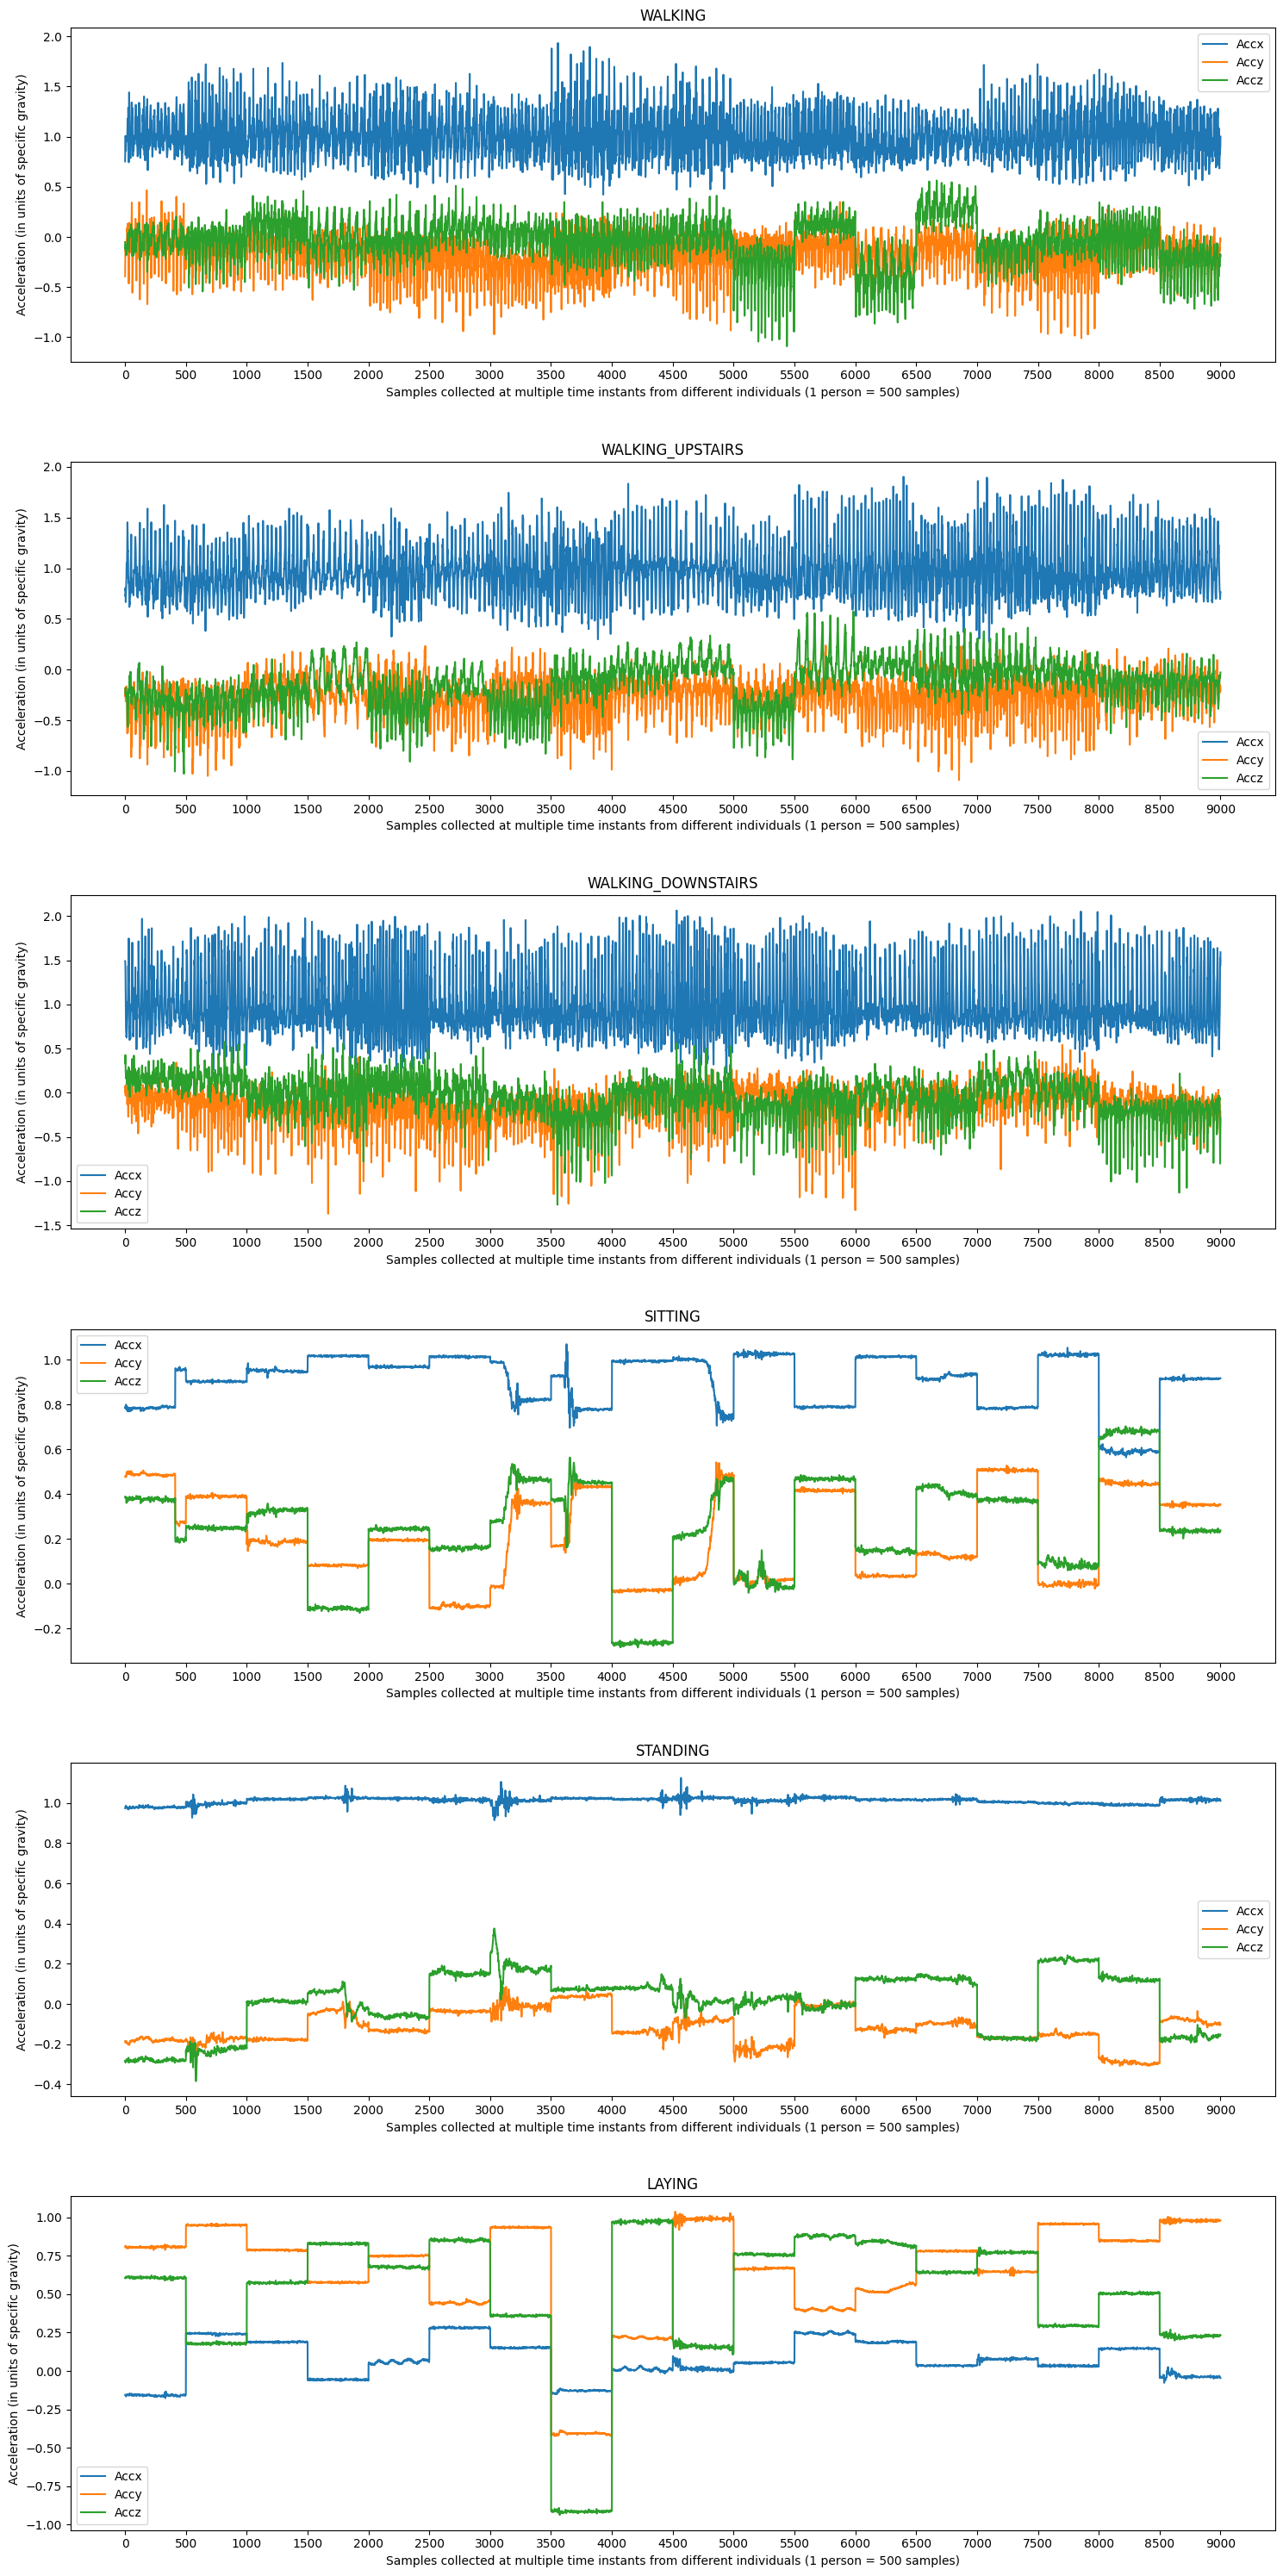

In [6]:
import matplotlib.pyplot as plt 

# Create the figure and subplots
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(15, 30))

# Iterate through each label and plot the accelerations
for i, label in enumerate(classes.keys()):
    
    data = df[df["Label"] == classes[label]]
    consecutive_index = range(1, len(data) + 1)
    axes[i].plot(consecutive_index, data["Accx"], label="Accx")
    axes[i].plot(consecutive_index, data["Accy"], label="Accy")
    axes[i].plot(consecutive_index, data["Accz"], label="Accz")
    axes[i].set_xlabel("Samples collected at multiple time instants from different individuals (1 person = 500 samples)")
    axes[i].set_ylabel("Acceleration (in units of specific gravity)")
    axes[i].set_xticks(range(0, len(consecutive_index) + 1, 500),  # Ticks every 200 points
               ["{}".format(i) for i in range(0, len(consecutive_index) + 1, 500)])  # Custom labels
    axes[i].set_title(label) 
    axes[i].legend()


# Adjust layout and display the plot

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)
plt.show()

#### Q:2 
Do you think we need a machine learning model to differentiate between static activities (laying, sitting, standing) and dynamic activities(walking, walking_downstairs, walking_upstairs)? Look at the linear acceleration $ {Acc_x}^2 + {Acc_y}^2 + {Acc_z}^2 $ for each activity and justify your answer.

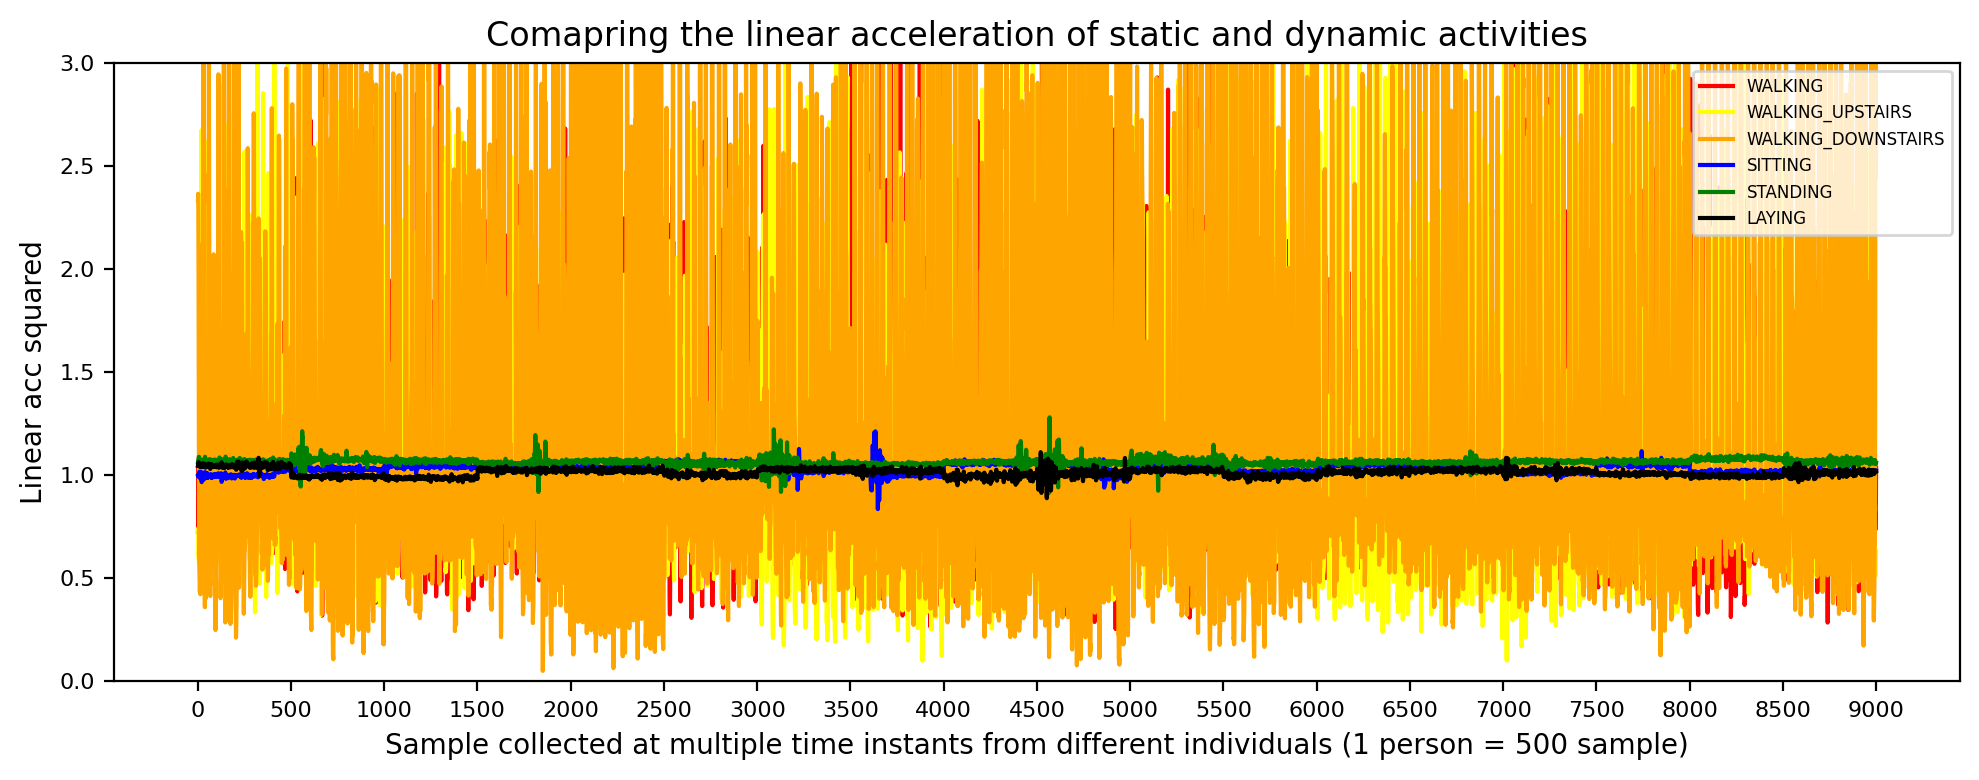

In [7]:
Static_Activities = {'SITTING':4 , 'STANDING':5 , 'LAYING':6}
Dynamic_Activities = {"WALKING":1 , "WALKING_UPSTAIRS":2 , "WALKING_DOWNSTAIRS":3}

colors = {'SITTING':'blue'  , 'STANDING':'green' , 'LAYING':'black' ,
          "WALKING":'red' , "WALKING_UPSTAIRS":'yellow', "WALKING_DOWNSTAIRS":'orange'}

fig = plt.figure(figsize = (10,4) , dpi = 200)
for i , label in enumerate(classes.keys()):
    
    data = df[df["Label"] == classes[label]]
    X_index = range(1, len(data) +1)
    lin_acc_sqrd = data['Accx']**2 + data['Accy']**2 + data['Accz']**2
    df.loc[df["Label"] == classes[label] , "Linaccsqrd"] = lin_acc_sqrd

    plt.plot(X_index , lin_acc_sqrd , label = label ,color = colors[label])
    plt.xlabel("Sample collected at multiple time instants from different individuals (1 person = 500 sample)")
    plt.ylabel("Linear acc squared")
    plt.ylim(0,3)
    plt.xticks(np.arange(0,9500,500))
    plt.legend(fontsize = 6)
    plt.tick_params(axis='both', labelsize=8)
plt.title("Comapring the linear acceleration of static and dynamic activities")
plt.tight_layout()    
plt.show()
               


#### Ans:
From the above graph we can see that there is more fluctuation in acceleration of Dynamic Activities(in range 0,3) meanwhile fluctuations in Static Activities are negligable (static at 1). Hence there is no need for ML to differenciate both the activities. We can easily do it by visualising the data.

In [8]:
df

,Accx,Accy,Accz,Label,Linaccsqrd
0,0.973608,-0.184475,-0.282197,5.0,1.061579
1,0.976087,-0.186779,-0.284879,5.0,1.068788
2,0.977865,-0.191836,-0.289169,5.0,1.076640
3,0.979638,-0.191792,-0.291794,5.0,1.081619
4,0.982244,-0.189156,-0.288260,5.0,1.083677
...,...,...,...,...,...
53995,0.730058,-0.197915,-0.066743,2.0,0.576609
53996,0.696212,-0.149662,-0.059822,2.0,0.510688
53997,0.731536,-0.162198,-0.049890,2.0,0.563943
53998,0.762215,-0.176539,-0.038009,2.0,0.613582


### Q:3
Visualize the data using PCA. [1 marks]
* Use PCA (Principal Component Analysis) on Total Acceleration to compress the acceleration timeseries into two features and plot a scatter plot to visualize different class of activities.

{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


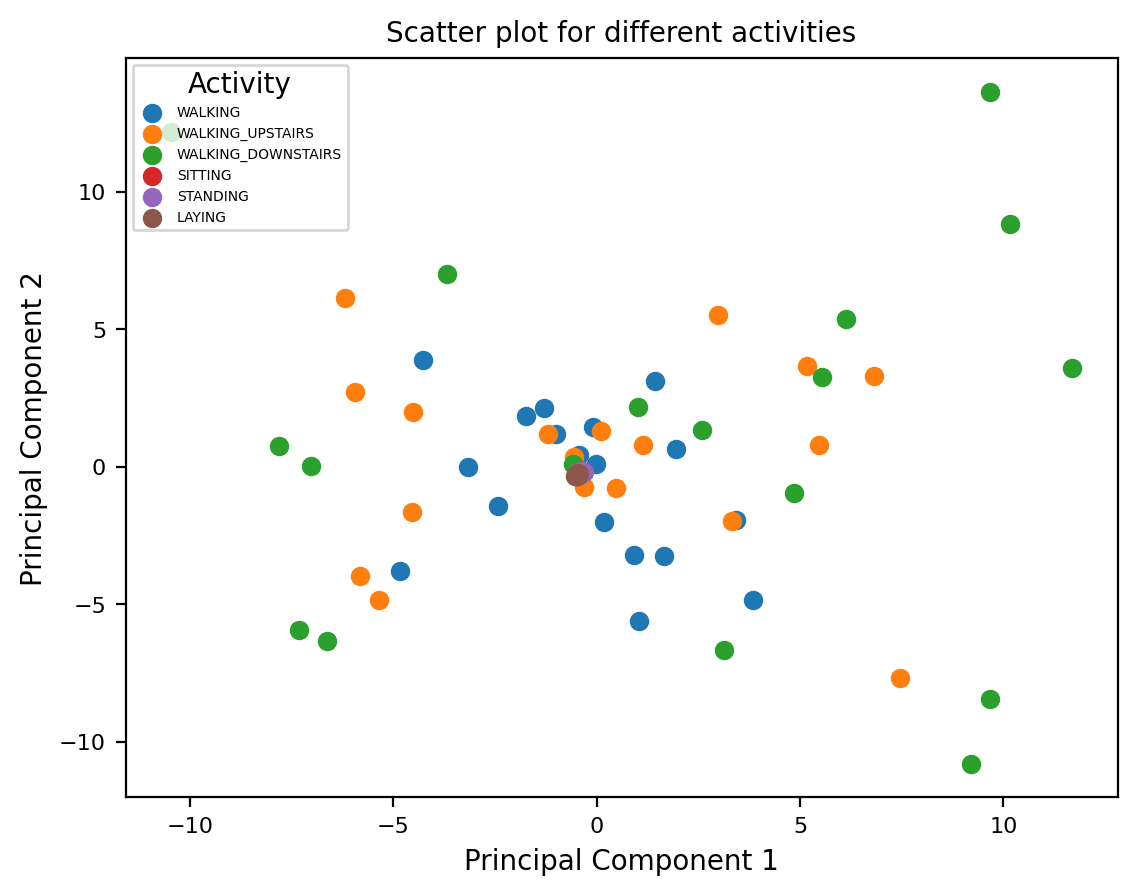

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
reshaped_data = df['Linaccsqrd'].values.reshape(-1,500)
x_reduced = pca.fit_transform(reshaped_data)

labels = pd.Series(df['Label'].values.reshape(-1,500).mean(axis=1))
unique_labels = sorted(pd.unique(labels))

reversed_classes = dict(zip(classes.values(), classes.keys()))
print(reversed_classes)

plt.figure(dpi = 200 )
for label in unique_labels:
    # print(x_reduced[labels == label,0])
     plt.scatter(x_reduced[labels == label , 0] ,x_reduced[labels ==label ,1] ,label = reversed_classes.get(label))
plt.xlabel("Principal Component 1" , size = 10)
plt.ylabel("Principal Component 2" , size = 10)
plt.title("Scatter plot for different activities" , size = 10)
plt.legend(loc = "upper left" ,title = "Activity" , fontsize = 5)
plt.tick_params(axis='both', labelsize=8)
plt.show()


##### In above plot we observing only the scattered data of Dynamic activity. Static Activity scattersed PCA components are at center and very close to each other. Let's Zoom in the data

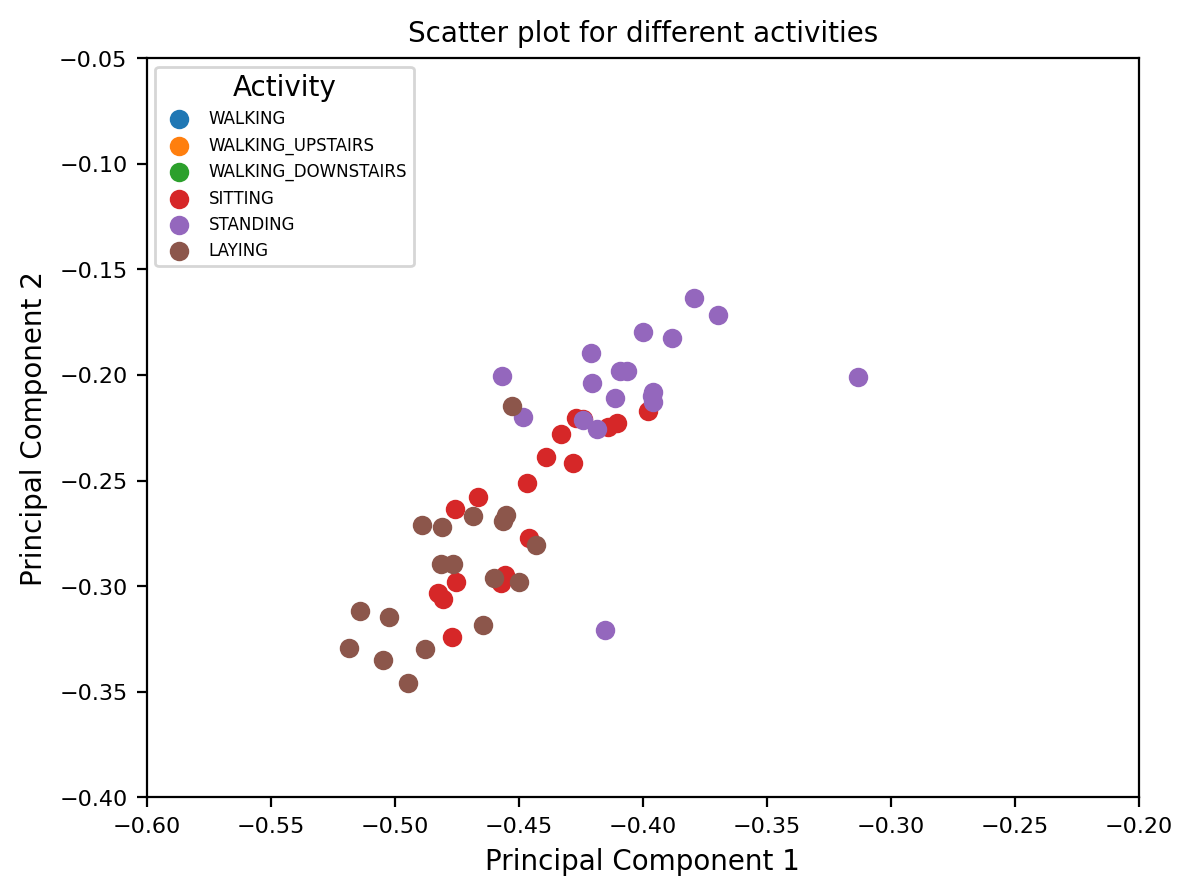

In [10]:
plt.figure(dpi = 200)
for label in unique_labels:
    # print(x_reduced[labels == label,0])
     plt.scatter(x_reduced[labels == label , 0] ,x_reduced[labels ==label ,1] ,label = reversed_classes.get(label))
plt.xlabel("Principal Component 1" , size = 10)
plt.xlim(-0.6, -0.2)
plt.ylim(-0.4, -0.05)
plt.ylabel("Principal Component 2" , size = 10)
plt.title("Scatter plot for different activities" , size = 10)
plt.legend(loc = "upper left" ,title = "Activity" , fontsize = 6)
plt.tick_params(axis='both', labelsize=8)
plt.show()

#### Key Points:

Scatter Plot of Static Activity (standing , laying , sitting) is grouped at center hence we can state that the varience of static activities are lower than the Dynamic activities


* Next, use TSFEL (a featurizer library) to create features (your choice which ones you feel are useful) and then perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

In [11]:
import tsfel

features = tsfel.get_features_by_domain()                                                        # If no argument is passed retrieves all available features
features_df = tsfel.time_series_features_extractor(features, df[['Accx', 'Accy', 'Accz']], fs=50, window_size=500)    # Receives a time series sampled at 50 Hz, divides into windows of size 250 (i.e. 5 seconds) and extracts all features
features_df
                                                       # If no argument is passed retrieves all available features
features_test_df = tsfel.time_series_features_extractor(features, test_df[['Accx', 'Accy', 'Accz']], fs=50, window_size=500)    # Receives a time series sampled at 50 Hz, divides into windows of size 250 (i.e. 5 seconds) and extracts all features
features_df

*** Feature extraction started ***



*** Feature extraction finished ***
*** Feature extraction started ***



*** Feature extraction finished ***


,Accx_Absolute energy,Accx_Area under the curve,Accx_Autocorrelation,Accx_Average power,Accx_Centroid,Accx_ECDF Percentile Count_0,Accx_ECDF Percentile Count_1,Accx_ECDF Percentile_0,Accx_ECDF Percentile_1,Accx_ECDF_0,...,Accz_Wavelet variance_0,Accz_Wavelet variance_1,Accz_Wavelet variance_2,Accz_Wavelet variance_3,Accz_Wavelet variance_4,Accz_Wavelet variance_5,Accz_Wavelet variance_6,Accz_Wavelet variance_7,Accz_Wavelet variance_8,Accz_Zero crossing rate
0,478.627177,9.764364,5.0,47.958635,4.989670,100.0,400.0,0.975656,0.980947,0.002,...,0.000127,0.000487,0.001049,0.001795,0.002722,0.003826,0.005097,0.006514,0.008064,0.0
1,494.970128,9.928839,3.0,49.596205,5.013402,100.0,400.0,0.989809,1.001942,0.002,...,0.000184,0.000685,0.001450,0.002508,0.003628,0.004581,0.005440,0.006352,0.007356,0.0
2,430.187347,9.028684,5.0,43.104945,4.914747,100.0,400.0,0.732451,1.062091,0.002,...,0.004605,0.020702,0.042012,0.073398,0.119603,0.177105,0.233516,0.276743,0.303233,8.0
3,554.535503,10.098470,5.0,55.564680,4.937297,100.0,400.0,0.752882,1.257718,0.002,...,0.003813,0.012729,0.017934,0.020055,0.023226,0.028327,0.033735,0.038540,0.042890,16.0
4,12.580069,1.582328,3.0,1.260528,5.016853,100.0,400.0,-0.162461,-0.154820,0.002,...,0.000565,0.002056,0.004411,0.007652,0.011869,0.017017,0.023023,0.029825,0.037375,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,543.448555,9.822271,5.0,54.453763,5.061037,100.0,400.0,0.704972,1.349636,0.002,...,0.014180,0.056817,0.088464,0.123827,0.160901,0.197897,0.220013,0.215158,0.187089,2.0
104,497.739114,9.755190,3.0,49.873659,4.944363,100.0,400.0,0.784800,1.202131,0.002,...,0.009342,0.034796,0.057884,0.100034,0.153607,0.202996,0.225477,0.211677,0.172606,10.0
105,515.531162,10.133725,2.0,51.656429,4.993441,100.0,400.0,1.011890,1.019253,0.002,...,0.000068,0.000253,0.000480,0.000774,0.001118,0.001487,0.001912,0.002436,0.003074,0.0
106,525.997480,9.983123,4.0,52.705158,5.065394,100.0,400.0,0.824270,1.190775,0.002,...,0.003018,0.013547,0.030818,0.055083,0.080357,0.103392,0.120844,0.128523,0.125302,16.0


{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


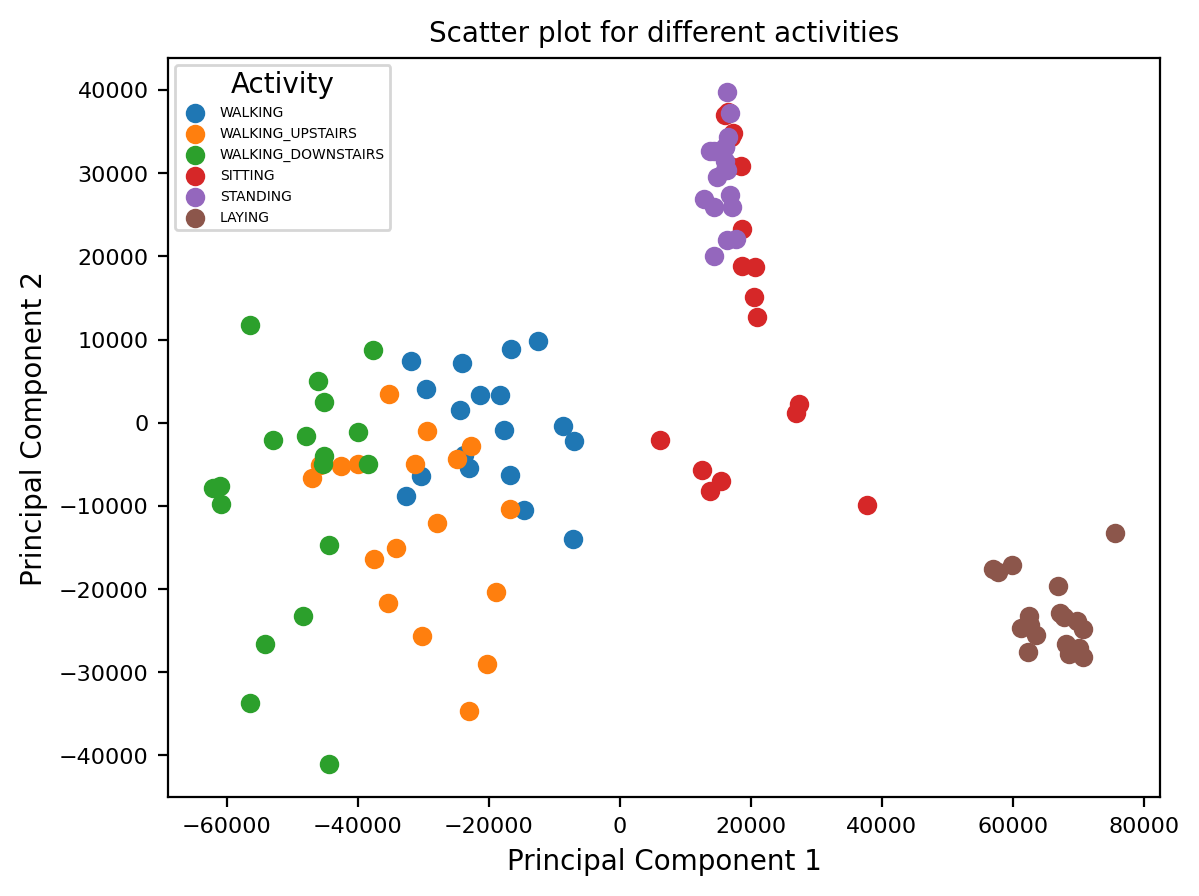

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x_reduced = pca.fit_transform(features_df)

labels = pd.Series(df['Label'].values.reshape(-1,500).mean(axis=1))
unique_labels = sorted(pd.unique(labels))

reversed_classes = dict(zip(classes.values(), classes.keys()))
print(reversed_classes)

plt.figure(dpi = 200 )
for label in unique_labels:
    # print(x_reduced[labels == label,0])
     plt.scatter(x_reduced[labels == label , 0] ,x_reduced[labels ==label ,1] ,label = reversed_classes.get(label))
plt.xlabel("Principal Component 1" , size = 10)
plt.ylabel("Principal Component 2" , size = 10)
plt.title("Scatter plot for different activities" , size = 10)
plt.legend(loc = "upper left" ,title = "Activity" , fontsize = 5)
plt.tick_params(axis='both', labelsize=8)
plt.show()

In [13]:
labels

0      5.0
1      5.0
2      2.0
3      3.0
4      6.0
      ... 
103    3.0
104    1.0
105    5.0
106    2.0
107    2.0
Length: 108, dtype: float64

Observation: The scatter plot obtained by using the TSFEL library on the 3-axis accelerometer values is significantly better than the plot obtained by directly using PCA on total linear acceleration.

Not only are the static and dynamic activities distinguishable, individual activities have also been spaced out well.

#### :-
* Now use the features provided by the dataset and perform PCA to obtain two features. Plot a scatter plot to visualize different class of activities.

#### Given Train set data with defined features

In [14]:
import pandas as pd

# Read the file into a DataFrame
given_data = pd.read_csv(r'C:\Users\dinub\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt', header=None,sep= r'\s+')
features_dataset = pd.read_csv(r'C:\\Users\\dinub\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\features.txt', header=None,sep= r'\s+')
y_label = pd.read_csv(r'C:\\Users\\dinub\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\train\\y_train.txt', header=None,sep= r'\s+')

# Insert a new row after the 561st row as there is 561 features 
if len(given_data) > 561:
    new_row = pd.DataFrame([[''] * given_data.shape[1]], columns=given_data.columns)
    given_data = pd.concat([given_data.iloc[:561], new_row, given_data.iloc[561:]]).reset_index(drop=True)

#CSV file for provided data
given_data
feature_names = features_dataset[1].values   # Features names
given_data.columns = feature_names  # Adding coumn to givendata
given_data["Label"] = y_label   # y train(label names)
given_data = given_data.dropna()  # if there is any missing features row

#### Given Test set data with defined features

In [15]:

given_test_data = pd.read_csv(r'C:\Users\dinub\Downloads\human+activity+recognition+using+smartphones\UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt', header=None,sep= r'\s+')
features_dataset = pd.read_csv(r'C:\\Users\\dinub\\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\features.txt', header=None,sep= r'\s+')
y_label_test = pd.read_csv(r'C:\\Users\\dinub\Downloads\\human+activity+recognition+using+smartphones\\UCI HAR Dataset\\UCI HAR Dataset\\test\\y_test.txt', header=None,sep= r'\s+')

# Insert a new row after the 561st row as there is 561 features 
if len(given_data) > 561:
    new_row = pd.DataFrame([[''] * given_test_data.shape[1]], columns=given_test_data.columns)
    given_test_data = pd.concat([given_test_data.iloc[:561], new_row, given_test_data.iloc[561:]]).reset_index(drop=True)

#CSV file for provided data
given_test_data
feature_names = features_dataset[1].values   # Features names
given_test_data.columns = feature_names  # Adding coumn to givendata
given_test_data["Label"] = y_label_test   # y train(label names)
given_test_data = given_test_data.dropna()

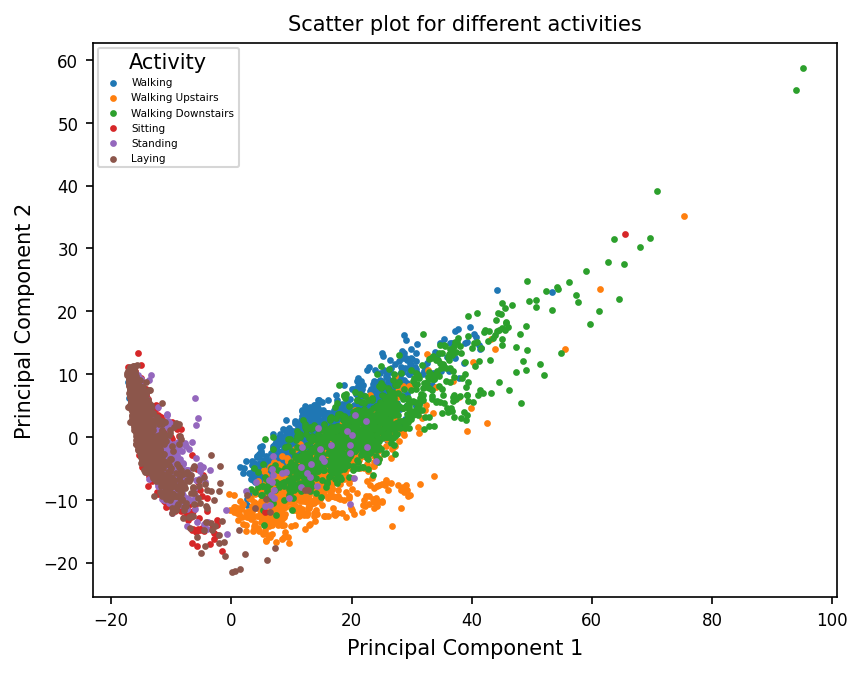

In [19]:
from sklearn.preprocessing import StandardScaler

# Replace empty strings with NaN
given_data.replace('', np.nan, inplace=True)
given_data.fillna(0, inplace=True)

# Separate features and labels
features = given_data.drop(columns=['Label'])
labels = given_data['Label']

# Standardize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
x_reduced = pca.fit_transform(features_scaled)
classes = {1: 'Walking', 2: 'Walking Upstairs', 3: 'Walking Downstairs', 4: 'Sitting', 5: 'Standing', 6: 'Laying'}
unique_labels = sorted(pd.unique(labels))
reversed_classes = {v: k for k, v in classes.items()}

# Plotting
plt.figure(dpi= 150)
for label in unique_labels:
    plt.scatter(x_reduced[labels == label, 0], x_reduced[labels == label, 1], label=classes.get(label) ,s = 5)
plt.xlabel("Principal Component 1", size=10)
plt.ylabel("Principal Component 2", size=10)
plt.title("Scatter plot for different activities", size=10)
plt.legend(loc="upper left", title="Activity", fontsize=5)
plt.tick_params(axis='both', labelsize=8)
plt.show()


* Compare the results of PCA on Total Acceleration, TSFEL and the dataset features. Which method do you think is better for visualizing the data?

#### Ans:-

* From the three PCA plots, we can observe that Plot 3 is the most effective for visualizing the data. In this plot, all the data points are closely clustered, and both static and dynamic activities form distinct groups.
* Comparing the results, we can conclude that the order of effectiveness is: Given data > TSFEL > Linear acceleration. 

### Q:4
Calculate the correlation matrix of the features obtained by TSFEL and provided in the dataset. Identify the features that are highly correlated with each other. Are there any redundant features? [1 marks]

In [17]:
import pandas as pd

tsfel_correlation_matrix = features_df.corr()
given_data_correlation_matrix = given_data.corr()

# print(tsfel_correlation_matrix)
# print('*'*300)
# print(given_data_correlation_matrix)


In [18]:
correlation_matrix = [tsfel_correlation_matrix, given_data_correlation_matrix]

for matrix in correlation_matrix:
    try:
        if not matrix.empty:
            # Set a threshold for high correlation
            threshold = 1
            
            
            # Find pairs of highly correlated features
            high_corr_pairs = [(i, j) for i in matrix.columns for j in matrix.columns if i != j and abs(matrix.at[i, j]) > threshold]
            
            # Display the highly correlated pairs
            print("Highly correlated pairs of features:")
            for pair in high_corr_pairs:
                print(pair, matrix.at[pair[0], pair[1]])
            print('***********************************************************************************************************')
        else:
            print("The correlation matrix is empty.")
        
    except Exception as e:
        print(f"An error occurred: {e}")


Highly correlated pairs of features:
('Accx_Absolute energy', 'Accx_Average power') 1.0000000000000002
('Accx_Average power', 'Accx_Absolute energy') 1.0000000000000002
('Accx_LPCC_5', 'Accx_LPCC_7') 1.0000000000000002
('Accx_LPCC_7', 'Accx_LPCC_5') 1.0000000000000002
('Accx_Mean absolute diff', 'Accx_Sum absolute diff') 1.0000000000000002
('Accx_Sum absolute diff', 'Accx_Mean absolute diff') 1.0000000000000002
('Accy_Absolute energy', 'Accy_Average power') 1.0000000000000007
('Accy_Average power', 'Accy_Absolute energy') 1.0000000000000007
('Accy_LPCC_1', 'Accy_LPCC_11') 1.0000000000000002
('Accy_LPCC_11', 'Accy_LPCC_1') 1.0000000000000002
('Accz_Absolute energy', 'Accz_Average power') 1.0000000000000004
('Accz_Average power', 'Accz_Absolute energy') 1.0000000000000004
('Accz_LPCC_5', 'Accz_LPCC_7') 1.0000000000000002
('Accz_LPCC_7', 'Accz_LPCC_5') 1.0000000000000002
('Accz_Mean absolute diff', 'Accz_Sum absolute diff') 1.0000000000000007
('Accz_Sum absolute diff', 'Accz_Mean absolute